In [2]:
library(dplyr)
library(ggplot2)

In [51]:
df <- read.csv("activity.csv")
df$date <- as.Date(df$date, "%Y-%m-%d")
head(df)
colnames(df)
str(df)


steps,date,interval
NA,2012-10-01,0
NA,2012-10-01,5
NA,2012-10-01,10
NA,2012-10-01,15
NA,2012-10-01,20
NA,2012-10-01,25


[1] "steps"    "date"     "interval"

'data.frame':	17568 obs. of  3 variables:
 $ steps   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date    : Date, format: "2012-10-01" "2012-10-01" ...
 $ interval: int  0 5 10 15 20 25 30 35 40 45 ...


* Histogram of the total number of steps taken each day
* Mean and median number of steps taken each day
* Time series plot of the average number of steps taken

(For this part of the assignment, you can ignore the missing values in the dataset.)

In [56]:
df1 <- group_by(df, date)
df1 <- df1[!is.na(df1$steps),]
sumr <- summarise(df1, totalsteps = sum(steps, na.rm = T))
meanr  <- summarise(df1, meansteps = mean(steps, na.rm = T))
head(sumr)
head(meanr)
summary(sumr$totalsteps)

date,totalsteps
2012-10-02,126
2012-10-03,11352
2012-10-04,12116
2012-10-05,13294
2012-10-06,15420
2012-10-07,11015


date,meansteps
2012-10-02,0.43750
2012-10-03,39.41667
2012-10-04,42.06944
2012-10-05,46.15972
2012-10-06,53.54167
2012-10-07,38.24653


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     41    8841   10765   10766   13294   21194 

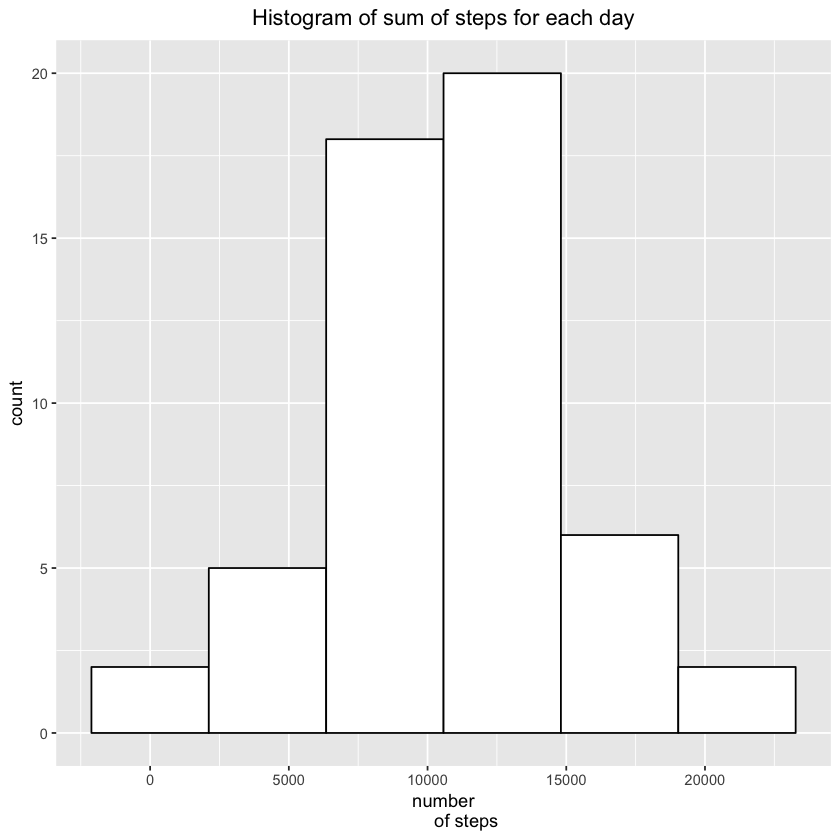

In [41]:
ggplot(data=sumr, aes(x =totalsteps )) + geom_histogram(bins = 6, fill="white",color="black") + xlab("number
         of steps") + ggtitle("Histogram of sum of steps for each day") + theme(plot.title = 
                                                                                element_text(hjust = 0.5))


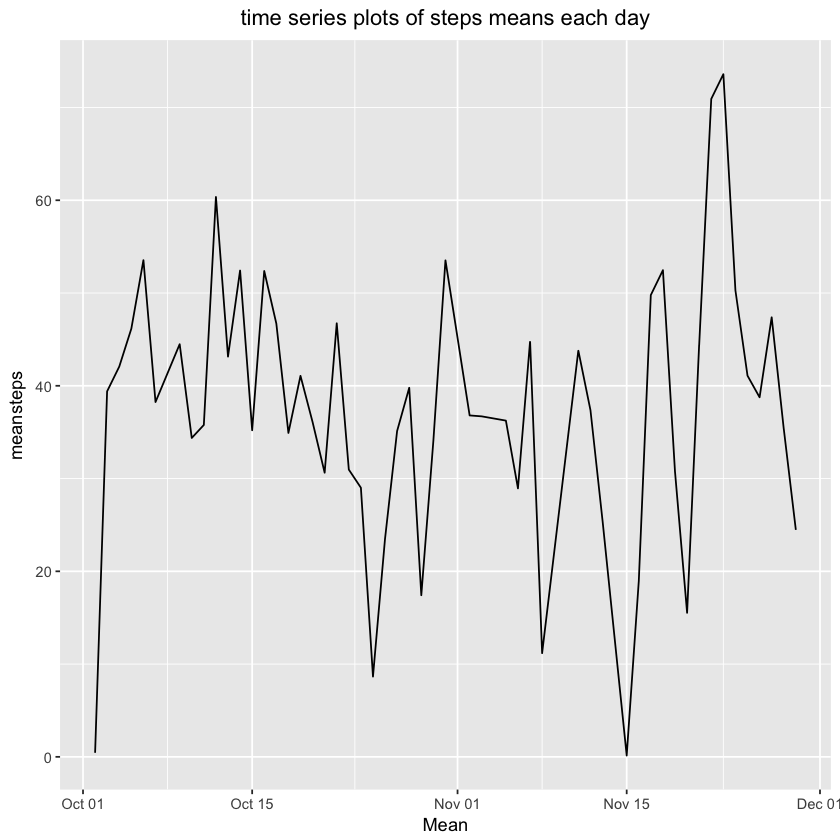

In [61]:
ggplot(data=meanr, aes(x = date, y =meansteps )) + geom_line() + xlab("Mean") + ggtitle("time series plots of steps means each day") + theme(plot.title = 
                                                                                element_text(hjust = 0.5))



* The 5-minute interval that, on average, contains the maximum number of steps


In [71]:
df[which.max(df$steps),]


,steps,date,interval
16492,806,2012-11-27,615


* Code to describe and show a strategy for imputing missing data

https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/

In [79]:
length(df[which(is.na(df$steps)),]$steps)/length(df$steps)

[1] 0.1311475

it shows that missing value comprised of 13% of total values

I chose Hot deck Imputation,which find all the sample subjects who are similar on other variables, then randomly choose one of their values on the missing variable.
One advantage is you are constrained to only possible values. Another is the random component, which adds in some variability. This is important for accurate standard errors.


In [89]:
install.packages("HotDeckImputation")

Installing package into ‘/Users/apple/Library/R/3.4/library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘slam’, ‘Rglpk’




The downloaded binary packages are in
	/var/folders/ww/6glkvg4s3hgd9p09584nhtqw0000gn/T//RtmpbmMSAH/downloaded_packages


In [91]:
library(HotDeckImputation)

In [97]:
# convert df into dfm as matrix
dfm <- data.matrix(df, rownames.force = NA)

Description:

A comprehensive function that performs nearest neighbor hot deck imputation. Aspects such as
variable weighting, distance types, and donor limiting are implemented. New concepts such as the
optimal distribution of donors are also available.


refer to : https://cran.r-project.org/web/packages/HotDeckImputation/HotDeckImputation.pdf

In [103]:
dfm1 <- impute.NN_HD(DATA = dfm, distance = "man", weights = "range", attributes = "sim",
comp = "rw_dist", donor_limit = Inf, optimal_donor = "no",
list_donors_recipients = NULL, diagnose = NULL)
df3 <- data.frame(dfm1)
df$steps <- df3$X1

* Histogram of the total number of steps taken each day after missing values are imputed



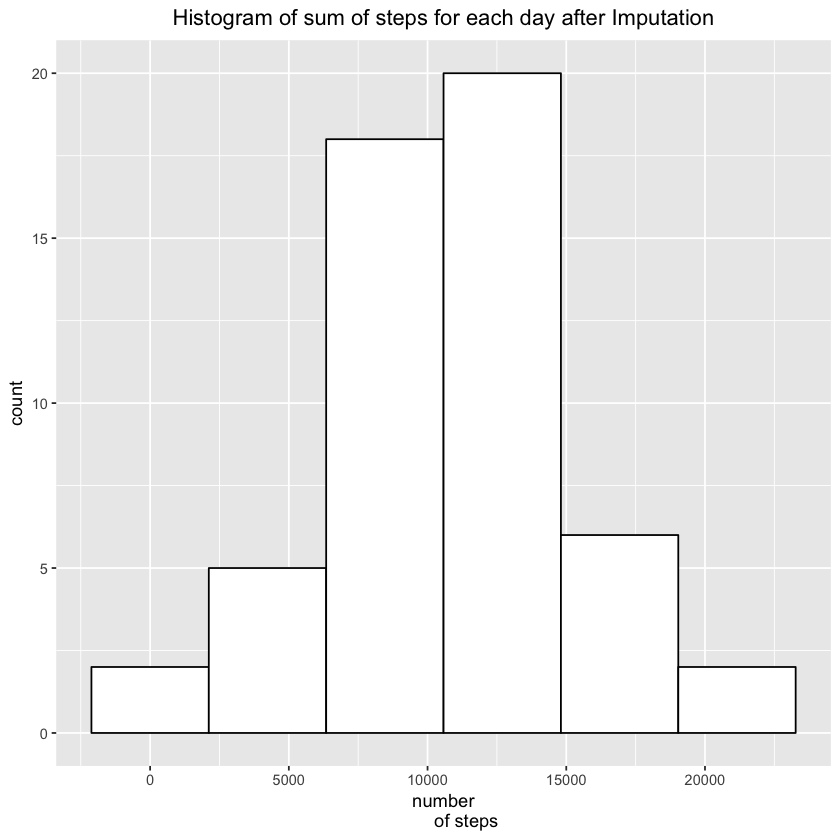

In [106]:
df4 <- group_by(df, date)
df4 <- df4[!is.na(df4$steps),]
sumr1 <- summarise(df1, totalsteps = sum(steps, na.rm = T))

ggplot(data=sumr1, aes(x =totalsteps )) + geom_histogram(bins = 6, fill="white",color="black") + xlab("number
         of steps") + ggtitle("Histogram of sum of steps for each day after Imputation") + theme(plot.title = 
                                                                                element_text(hjust = 0.5))



* Panel plot comparing the average number of steps taken per 5-minute interval across weekdays and weekends




In [141]:
dateType <- unlist(df$date)
DateType <- function(dt){
    
    days <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    
    if (weekdays(dt) %in% days[1:5]){
        return("weekdays")
    }
    else if (weekdays(dt) %in% days[6:7]) {
        return("weekends")
    }
}
newcol <- sapply(dateType, DateType)
df$DateTpe <- newcol
mean_number_steps <- aggregate(steps ~ interval+DateTpe, df, mean)
head(mean_number_steps) 

interval,DateTpe,steps
0,weekdays,2.0444444
5,weekdays,0.4222222
10,weekdays,0.1777778
15,weekdays,0.2000000
20,weekdays,0.1111111
25,weekdays,1.3333333


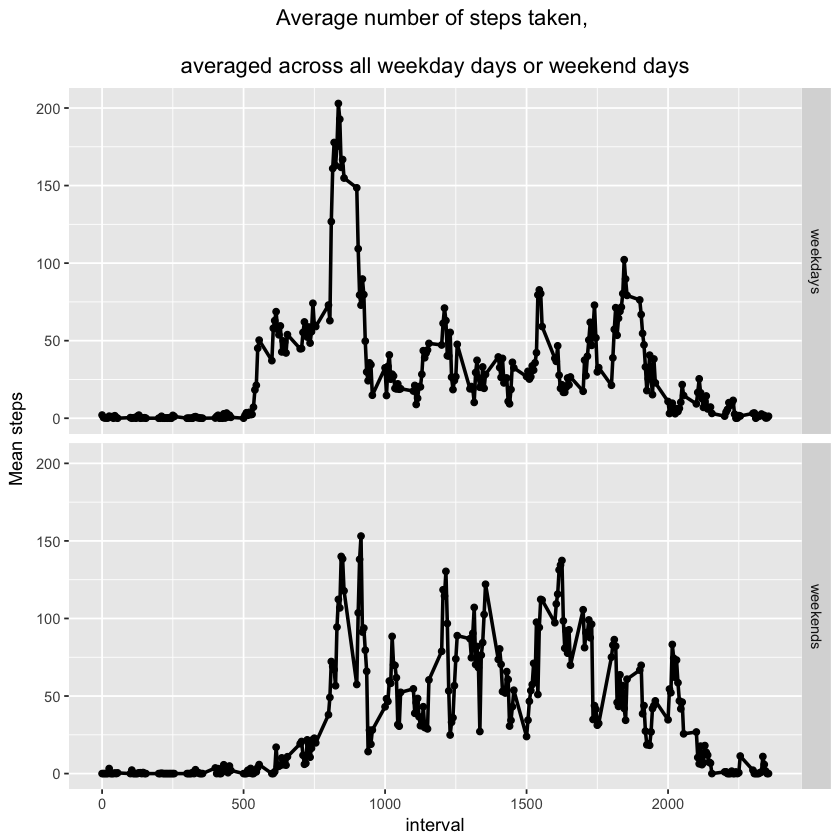

In [148]:
g <- qplot(interval, steps, data = mean_number_steps, facets = DateTpe~.)
g + geom_line(size = 1)+ ylab("Mean steps") + ggtitle("Average number of steps taken, 
\n averaged across all weekday days or weekend days ")+ theme(plot.title = element_text(hjust = 0.5))

